In [81]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn import tree
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report


In [82]:
data = pd.read_csv(r"C:\Users\שירה טיירי\Desktop\מטלת גמר מדעי הנתונים\archive\fetal_health.csv")

In [83]:
# # Initialise the Scaler 
# scaler = StandardScaler() 
# # To scale data 
# scaler.fit(data) 
# scaler.transform(data)

In [84]:
data.head()
d=data.groupby('fetal_health')
d['baseline value'].mean()

fetal_health
1.0    131.981873
2.0    141.684746
3.0    131.687500
Name: baseline value, dtype: float64

# Features

   * #### 'baseline value'- 
   FHR baseline (beats per minute)
   * #### 'accelerations'-
   Number of accelerations per second
   * #### 'fetal_movement'-
   Number of fetal movements per second
   * #### 'uterine_contractions'-
   Number of uterine contractions per second
   * #### 'light_decelerations'-
   Number of light decelerations per second
   * #### 'severe_decelerations'-
   Number of severe decelerations per second
   * #### 'prolongued_decelerations'-
   Number of prolonged decelerations per second
   * #### 'abnormal_short_term_variability'-
   Percentage of time with abnormal short term variability
   * #### 'mean_value_of_short_term_variability'-
   Mean value of short term variability
   * #### 'percentage_of_time_with_abnormal_long_term_variability'-
   Percentage of time with abnormal long term variability
   * #### 'mean_value_of_long_term_variability'-
   Mean value of long term variability
   * #### 'histogram_width'-
   Width of FHR histogram
   * #### 'histogram_min'-
   Minimum (low frequency) of FHR histogram
   * #### 'histogram_max'-
   Maximum (high frequency) of FHR histogram
   * #### 'histogram_number_of_peaks'-
   Number of histogram peaks
   * #### 'histogram_number_of_zeroes'-
   Number of histogram zeros
   * #### 'histogram_mode'-
   Histogram mode
   * #### 'histogram_mean'-
   Histogram mean
   * #### 'histogram_median'-
   Histogram median
   * #### 'histogram_variance'-
   Histogram variance
   * #### 'histogram_tendency'-
   Histogram tendency
   * #### Target: 'fetal_health'-
   Tagged as 1 (Normal), 2 (Suspect) and 3 (Pathological)

In [85]:
print("size of data:", data.shape)

size of data: (2126, 22)


In [86]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [87]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [88]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


Normal: 1655 Suspect: 295 Pathological: 176


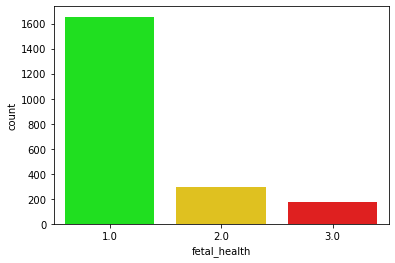

In [89]:
normal= (data.fetal_health == 1.0).sum()
suspect= (data.fetal_health == 2.0).sum()
pathological= (data.fetal_health == 3.0).sum()
print("Normal:" , normal , "Suspect:" , suspect , "Pathological:" , pathological)

colours=["#00FF00","#FFD700", "#FF0000"]
sns.countplot(data= data, x="fetal_health",palette=colours)
plt.show()

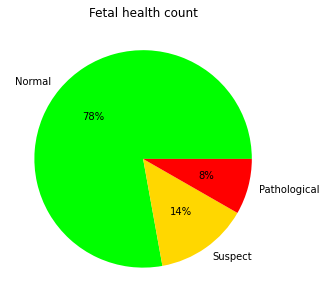

In [90]:
plt.figure(figsize = (10,5))
vis_pie_fetal_health = plt.pie([normal, suspect, pathological], labels=["Normal", "Suspect", "Pathological"], colors = ["#00FF00", "#FFD700", "#FF0000"], autopct="%1.0f%%")
plt.title("Fetal health count")
plt.show()

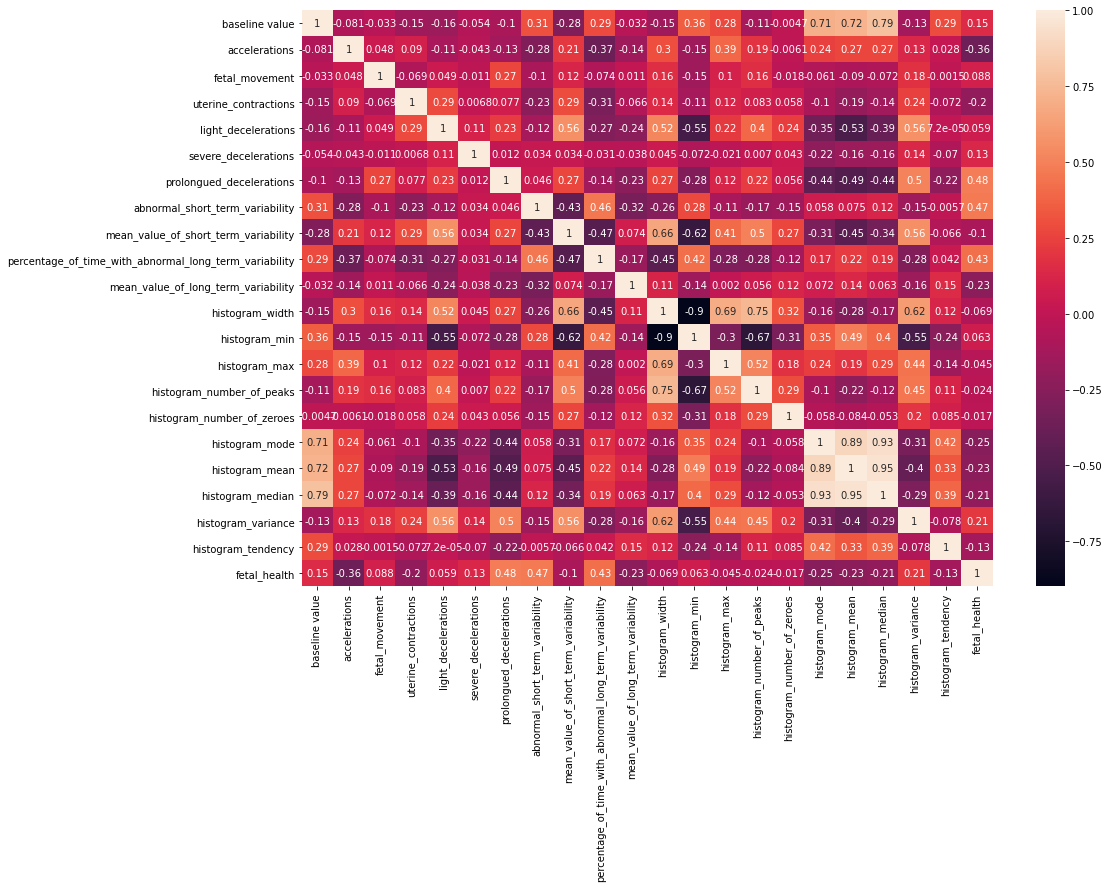

In [91]:
fig= plt.figure()
axes= fig.add_axes([0,0,2,2])
sns.heatmap(data.corr(), annot=True)
plt.show()

If we look here ⬆️ it seems that prolongued_decelerations have a great impact on the fetal health

lets check the percentage of normal, suspect and pathological (fetal health)  without prolongued_decelerations:

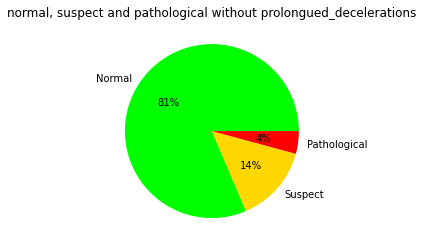

In [92]:
h=data[data.prolongued_decelerations==0]
Normal = h[h.fetal_health == 1.0].shape[0] #מספר שורות שיש 1 בבריאות 
Suspect = h[h.fetal_health == 2.0].shape[0]
Pathological =h[h.fetal_health == 3.0].shape[0]
vis_pie_fetal_health = plt.pie([(Normal/h.shape[0])*100, (Suspect/h.shape[0])*100, (Pathological/h.shape[0])*100], labels=["Normal", "Suspect", "Pathological"], colors = ["#00FF00", "#FFD700", "#FF0000"], autopct="%1.0f%%")
plt.title("normal, suspect and pathological without prolongued_decelerations")
plt.show()

In order to better illustrate the effect of prolongued_decelerations on fetal health 
Let's look at the percentage of healthy fetuses suffering from prolongued_decelerations, we can see that it is a small percentage⬇️

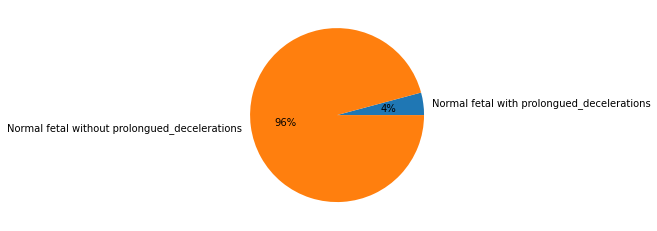

In [93]:
Normal = data[data.fetal_health == 1.0]
nh=Normal[Normal.prolongued_decelerations!=0].shape[0]
h=Normal[Normal.prolongued_decelerations==0].shape[0]
vis_pie_fetal_health = plt.pie([(nh/Normal.shape[0])*100, (h/Normal.shape[0])*100], labels=["Normal fetal with prolongued_decelerations", "Normal fetal without prolongued_decelerations"],autopct="%1.0f%%")


In contrast there is a high percentage of pathological fetuses suffering from prolongued_decelerations⬇️

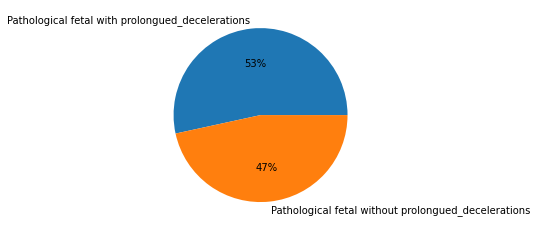

In [94]:
Pathological = data[data.fetal_health == 3.0]
nh=Pathological[Pathological.prolongued_decelerations!=0].shape[0]
h=Pathological[Pathological.prolongued_decelerations==0].shape[0]
vis_pie_fetal_health = plt.pie([(nh/Pathological.shape[0])*100, (h/Pathological.shape[0])*100], labels=["Pathological fetal with prolongued_decelerations", "Pathological fetal without prolongued_decelerations"],autopct="%1.0f%%")

#### t-SNE

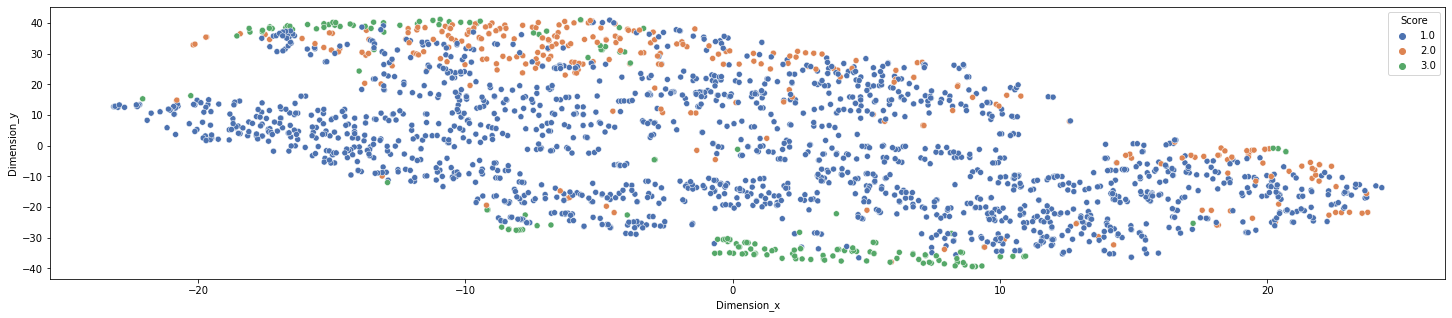

In [95]:
from sklearn.manifold import TSNE
x = data[['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']]
y = data['fetal_health'].values
tsne = TSNE(n_components=2, perplexity=90, learning_rate=200)
X_embedding = tsne.fit_transform(x)

for_tsne = np.hstack((X_embedding, y.reshape(-1,1)))
for_tsne_df = pd.DataFrame(data=for_tsne, columns=['Dimension_x','Dimension_y','Score'])
fig, ax =plt.subplots(figsize=(25,5))
sns.scatterplot(data=for_tsne_df,x='Dimension_x',y='Dimension_y',hue='Score',palette="deep");

t-SNE is giving good results, we can see clusters are differentiable.

In [96]:
#data['baseline value'] = data.apply(lambda row: ((row.baseline value)* 0.1), axis = 1)

# Training & Testing

#### KNN- k-nearest neighbors model:

We will split the data for training and test:

In [97]:
x = data.drop('fetal_health', axis=1) # all columns whthout prediction column 
y = data.fetal_health                 # prediction column 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)
print ("number of columns for the training:", x_train.shape,"number of columns for the test:", x_test.shape)
print ("number of prediction column for the training:",y_train.shape,"number of prediction column for the test:", y_test.shape) 

number of columns for the training: (1594, 21) number of columns for the test: (532, 21)
number of prediction column for the training: (1594,) number of prediction column for the test: (532,)


The knn accuracy:

In [98]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)                  # Training of all columns and training of the prediction column
knn_predict = knn.predict(x_test)          # predictor (test)
knn_accuracy = accuracy_score(y_test, knn_predict)           # Accuracy tester compared to the test prediction column
knn_accuracy

0.9097744360902256

let's look at the knn accuracy with 1-10 neighbors:

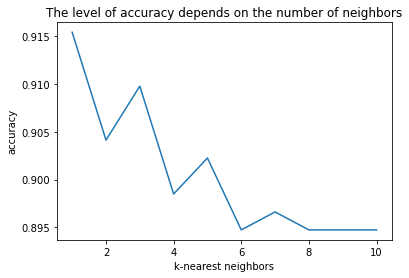

In [99]:
listX=[]
listY=[]
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    knn_predict = knn.predict(x_test)
    listX.append(i)
    listY.append(accuracy_score(y_test, knn_predict))
    #print(accuracy_score(y_test, knn_predict))
plt.plot(listX, listY)
plt.xlabel("k-nearest neighbors")
plt.ylabel("accuracy")
plt.title("The level of accuracy depends on the number of neighbors")
plt.show()

#### Decision tree model:

In [100]:
dtree=DecisionTreeClassifier(random_state=1)
dtree.fit(x_train,y_train)                     #training
dtree_predict=dtree.predict(x_test)
print( "accuracy:" ,accuracy_score(y_test,dtree.predict(x_test)))   #accuracy of testing

accuracy: 0.9323308270676691


#### dummy model:
With a bad model the accuracy will be bad:

In [101]:
dummy= DummyClassifier(strategy="stratified")
dummy.fit(x_train, y_train)
DummyClassifier(strategy='stratified')
dummy_predict = dummy.predict(x_test)
print( "accuracy:" ,dummy.score(y_test, dummy_predict))             #dummy_accuracy

accuracy: 0.6203007518796992


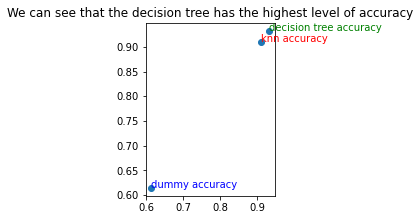

In [102]:
fig= plt.figure()
axes= fig.add_axes([1,1,0.3,0.6])
knn= knn_accuracy
decisionTree= accuracy_score(y_test,dtree.predict(x_test))
dummy= dummy.score(y_test, dummy_predict)
x= [knn,decisionTree,dummy]
y= [knn,decisionTree,dummy]
plt.scatter(x,y)
plt.title("We can see that the decision tree has the highest level of accuracy")
axes.annotate("knn accuracy", xy=(knn,knn) , size=10, color='r')
axes.annotate("decision tree accuracy", xy=(decisionTree,decisionTree) , size=10, color='g')
axes.annotate("dummy accuracy", xy=(dummy,dummy) , size=10, color='b')
plt.show(x,y)

## metrics confusion ##

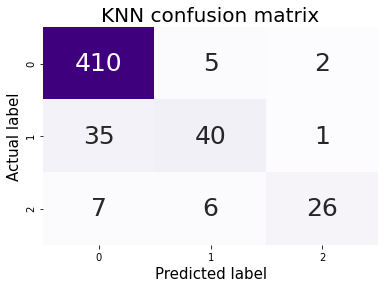

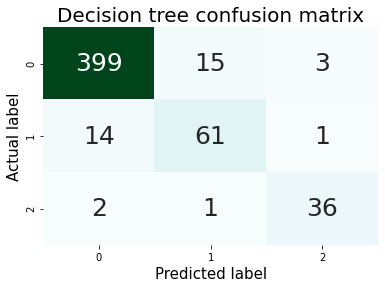

In [103]:
knn_confusion = metrics.confusion_matrix(y_test, knn_predict)
dtree_confusion = metrics.confusion_matrix(y_test, dtree_predict)

sns.heatmap(knn_confusion, annot=True, cmap="Purples", fmt="d",cbar=False, annot_kws={"size": 25})
plt.xlabel("Predicted label",fontsize=15)
plt.ylabel("Actual label",fontsize=15)
plt.title("KNN confusion matrix",size= 20)
plt.show()
sns.heatmap(dtree_confusion, annot=True, cmap="BuGn", fmt="d",cbar=False, annot_kws={"size": 25})
plt.xlabel("Predicted label",fontsize=15)
plt.ylabel("Actual label",fontsize=15)
plt.title("Decision tree confusion matrix",size= 20)
plt.show()

#### Recall and Precision
of knn and decision tree:

we saw that the decision tree has the highest level of accuracy and now we can also see that the recall of the decision tree is the highest.
it is good because we will reduce the number of false negative and identify pathological fetal health. 

In [104]:
print("knn:", classification_report(y_test, knn_predict))
print("Dec\ntree:",classification_report(y_test, dtree_predict))

knn:               precision    recall  f1-score   support

         1.0       0.91      0.98      0.94       417
         2.0       0.78      0.53      0.63        76
         3.0       0.90      0.67      0.76        39

    accuracy                           0.89       532
   macro avg       0.86      0.73      0.78       532
weighted avg       0.89      0.89      0.89       532

Dec
tree:               precision    recall  f1-score   support

         1.0       0.96      0.96      0.96       417
         2.0       0.79      0.80      0.80        76
         3.0       0.90      0.92      0.91        39

    accuracy                           0.93       532
   macro avg       0.88      0.89      0.89       532
weighted avg       0.93      0.93      0.93       532



## ROC ##

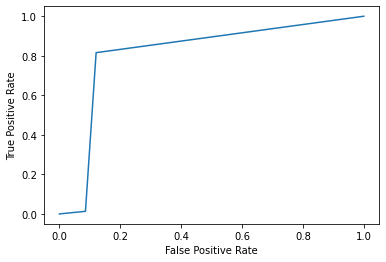

In [105]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
y_score = dtree.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=dtree.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [106]:
def pred(model):
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    accuracy_score(y_test, prediction)
    print("model: ", model)
    print("Accuracy: ", accuracy_score(y_test, prediction)*100)

In [107]:
from sklearn.ensemble import AdaBoostClassifier
pred(AdaBoostClassifier())

model:  AdaBoostClassifier()
Accuracy:  91.16541353383458


In [124]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
ada = AdaBoostClassifier(n_estimators=800, random_state=1)
ada.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=800, random_state=1)
ada_predict = ada.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_predict)*100
print ("AdaBoost accuracy: " + str(ada_accuracy) + "%")

AdaBoost accuracy: 86.09022556390977%


In [108]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [109]:
vtcls = VotingClassifier([('lr', LogisticRegression()), ('dt', DecisionTreeClassifier()), ('knn', KNeighborsClassifier()),('ab', AdaBoostClassifier()) ,
                       ('xgb', GradientBoostingClassifier()), ('rfc',RandomForestClassifier(n_estimators=10, random_state=42)),('mpp', make_pipeline(StandardScaler(),LinearSVC(random_state=1, tol=1e-5)))])
pred(vtcls)



C:\newuser\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


model:  VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('dt', DecisionTreeClassifier()),
                             ('knn', KNeighborsClassifier()),
                             ('ab', AdaBoostClassifier()),
                             ('xgb', GradientBoostingClassifier()),
                             ('rfc',
                              RandomForestClassifier(n_estimators=10,
                                                     random_state=42)),
                             ('mpp',
                              Pipeline(steps=[('standardscaler',
                                               StandardScaler()),
                                              ('linearsvc',
                                               LinearSVC(random_state=1,
                                                         tol=1e-05))]))])
Accuracy:  94.73684210526315


C:\newuser\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


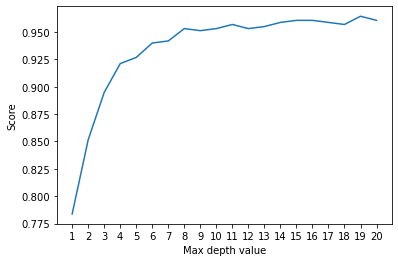

the maximum Random Forest score is: 96.42857142857143% while max depth=12


In [110]:
from sklearn.ensemble import RandomForestClassifier
arr = []
for i in range(1,21):
    ran = RandomForestClassifier(max_depth=i)
    ran.fit(x_train, y_train)
    ran_predict = ran.predict(x_test)
    arr.append(accuracy_score(y_test, ran_predict))

plt.plot(range(1,21), arr)
plt.xticks(np.arange(1,21,1))
plt.xlabel("Max depth value")
plt.ylabel("Score")
plt.show()

ran_accuracy = max(arr)
print ("the maximum Random Forest score is: " + str(ran_accuracy*100) + "% while max depth=12")

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
pred(GradientBoostingClassifier())

model:  GradientBoostingClassifier()
Accuracy:  97.36842105263158


In [117]:
 איקס גיבוס פייפליין ווטינג סטאקינג

SyntaxError: invalid syntax (<ipython-input-117-b0bea9c9192b>, line 1)

In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA()
# pca.fit(x_train)
# cumsum = np.cumsum(pca.explained_variance_ratio_)
# d = np.argmax(cumsum >= 0.90) + 1
# pca = PCA(n_components=0.90)
# X_train = pca.fit_transform(x_train)
# X_test = pca.transform(x_test)

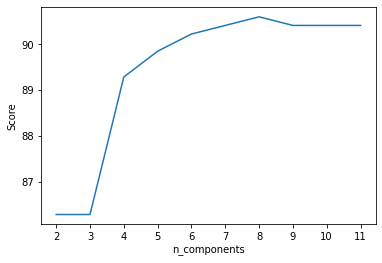

the maximum KNeighbors score is: 90.6015037593985% while n_components=4


In [116]:
arr = []
for i in range(2,12):
    pca = PCA(n_components = i)
    X_train = pca.fit_transform(x_train)
    X_test = pca.transform(x_test)
    explained_variance = pca.explained_variance_ratio_
    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    knn_predict = knn.predict(X_test)
    arr.append(accuracy_score(y_test, knn_predict)*100)

plt.plot(range(2,12), arr)
plt.xticks(np.arange(2,12,1))
plt.xlabel("n_components")
plt.ylabel("Score")
plt.show()

knn_pca = max(arr)
print ("the maximum KNeighbors score is: " + str(knn_pca) + "% while n_components=4")

In [114]:
pca = PCA(n_components = i)
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_